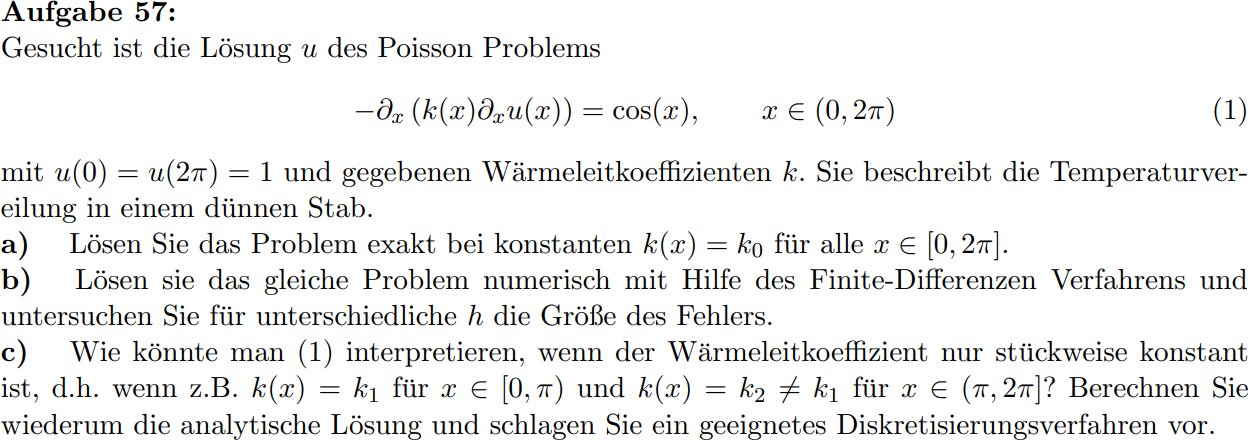

In [2]:
import numpy as np
import matplotlib.pyplot as plt

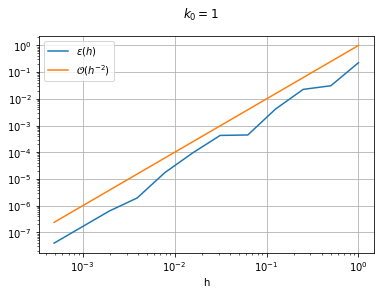

True

In [53]:
def A(h, k_0, a, b):

    N = int((b - a)/h)

    middle = np.ones(N) * -2
    up = down = np.ones(N-1)

    matrix = np.diag(up, 1) + np.diag(middle, 0) + np.diag(down, -1)
    matrix *= -k_0 / h**2

    return matrix

def g(h, k_0, a, b):

    x = np.arange(a, b, h)[1::]

    vector = np.cos(x)
    vector[0]  += k_0 / h**2
    vector[-1] += k_0 / h**2

    return vector

u = lambda x, k_0: 1/k_0 * (np.cos(x) + k_0 - 1)

def solve(h, k_0):

    a = 0
    b = 2 * np.pi

    matrix = A(h, k_0, a, b)
    vector = g(h, k_0, a, b)

    y = np.linalg.solve(matrix, vector)
    y = np.array([1] + list(y) + [1])

    x = np.array(list(np.arange(a, b, h)) + [b])

    return x, y

def convergence(k_0):

    H = [1 / 2**p for p in range(12)]
    E = []

    for h in H:

        x, y = solve(h, k_0)
        numerical  = y
        analytical = u(x, k_0)
        E += [max(abs(analytical - numerical))]

    H = np.array(H)
    E = np.array(E)

    plt.loglog(H, E,    label = '$\epsilon(h)$')
    plt.loglog(H, H**2, label = '$\mathcal{O}(h^{{-2}})$')

    plt.legend()
    plt.xlabel('h')
    plt.suptitle('$k_0 = {}$'.format(k_0))
    plt.grid(True)
    plt.show()

    return True

convergence(1)

In [54]:
import sympy as sp

In [68]:
k = sp.IndexedBase('k')

matrix = sp.Matrix([[k[2] * sp.pi, -k[1] * sp.pi, -k[1]],
                    [k[2],         -k[1],          0   ],
                    [0,                2 * sp.pi,  1   ]])

vector = sp.Matrix([2 * k[2] - k[1] * k[2] - k[1], 0, k[2] - 1])

system = (matrix, vector)

list(sp.linsolve(system))[0]

((-k[1] + k[2])/(pi*k[2]), (-k[1] + k[2])/(pi*k[1]), k[2] + 1 - 2*k[2]/k[1])